In [20]:
import sys,os,os.path
os.environ['http_proxy']="http://localhost:3128"
os.environ['https_proxy']="https://localhost:3128"

In [21]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [22]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [23]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [24]:
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [26]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [27]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [28]:
from keras import losses
from keras import metrics
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [29]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [30]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 239us/step - loss: 0.5147 - acc: 0.7790 - val_loss: 0.3935 - val_acc: 0.8534
Epoch 2/20
15000/15000 [==============================] - 2s 120us/step - loss: 0.3003 - acc: 0.9006 - val_loss: 0.3031 - val_acc: 0.8860
Epoch 3/20
15000/15000 [==============================] - 2s 117us/step - loss: 0.2165 - acc: 0.9287 - val_loss: 0.2778 - val_acc: 0.8912
Epoch 4/20
15000/15000 [==============================] - 2s 112us/step - loss: 0.1720 - acc: 0.9429 - val_loss: 0.2763 - val_acc: 0.8904
Epoch 5/20
15000/15000 [==============================] - 2s 114us/step - loss: 0.1372 - acc: 0.9554 - val_loss: 0.2817 - val_acc: 0.8887
Epoch 6/20
15000/15000 [==============================] - 2s 113us/step - loss: 0.1163 - acc: 0.9630 - val_loss: 0.2981 - val_acc: 0.8869
Epoch 7/20
15000/15000 [==============================] - 2s 110us/step - loss: 0.0965 - acc: 0.9719 - val_loss: 0.3176 - 

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt

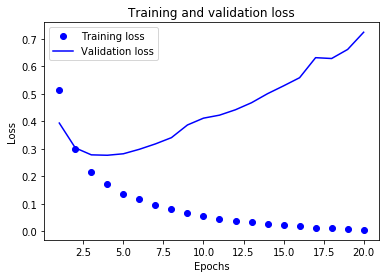

In [32]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [9]:
myt = {'x', 1, 'y', 2, 'z', 3}

In [15]:
def foo(**args):
    print(args)

In [17]:
foo(x=1, y=2, z=3)

{'x': 1, 'y': 2, 'z': 3}
